# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import json


from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['tasiilaq',
 'rio gallegos',
 'castro',
 'rikitea',
 'punta arenas',
 'yertsevo',
 'busselton',
 'belushya guba',
 'atuona',
 'hobart',
 'narsaq',
 'sentyabrskiy',
 'kodinsk',
 'saldanha',
 'hirara',
 'attawapiskat',
 'agadez',
 'dawei',
 'mwinilunga',
 'hithadhoo',
 'upernavik',
 'kavieng',
 'ushuaia',
 'saint-philippe',
 'siva',
 'ribeira grande',
 'goalpara',
 'illoqqortoormiut',
 'batsfjord',
 'albany',
 'mana',
 'nizhneyansk',
 'sandpoint',
 'nefteyugansk',
 'vestmannaeyjar',
 'mikhaylovka',
 'ancud',
 'saleaula',
 'caravelas',
 'bobrovka',
 'vila',
 'pedro ii',
 'grand river south east',
 'tuktoyaktuk',
 'kaeo',
 'barrow',
 'lagoa',
 'saint george',
 'mahebourg',
 'bethel',
 'taolanaro',
 'arraial do cabo',
 'longyearbyen',
 'faanui',
 'kodiak',
 'naples',
 'kaitangata',
 'okhotsk',
 'gambo',
 'talnakh',
 'mataura',
 'jalu',
 'kapaa',
 'yellowknife',
 'vestmanna',
 'shenjiamen',
 'gat',
 'sorvag',
 'lebu',
 'bredasdorp',
 'liberty',
 'maumere',
 'isilkul',
 'pacific grove',
 'be

In [3]:
lat_lngs

[(72.96971061568746, -34.53441043589413),
 (-51.215655372617505, -67.37516352201291),
 (-46.155580817233904, -80.43076317200524),
 (-65.50089476552496, -133.43919956641395),
 (-64.65785331130782, -104.63479935496285),
 (60.62600530309746, 39.30121208759405),
 (-36.95695289164455, 91.54549351101912),
 (84.02180631825934, 44.33455493971542),
 (7.274702950630555, -141.53624516180736),
 (-16.679406769720742, -139.90590738642743),
 (-81.74651513329079, 142.58249602788743),
 (81.54284659396836, -66.61426973097159),
 (34.86511226109813, 156.04004240307484),
 (58.18624073702037, 100.10515373044387),
 (-36.42798495013007, 5.102687838552157),
 (22.409771100458443, 126.70660837061752),
 (60.55714012080844, -88.47669368625289),
 (17.13549037261562, 7.679586780329345),
 (12.813699386165652, 95.75043170664651),
 (-12.10205888066777, 23.346771881319683),
 (-10.624545963079044, 83.25968628291736),
 (84.18355504039158, -45.560942521338404),
 (2.0737338545756927, 153.38505823146141),
 (-75.9634168309251

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print logof each city as it'sbeing processed (with the city number and city name).


In [4]:
# Variables and lists declaration
lat = []
lng = []
humidity = []
cloud = []
wind_speed = []
country = []
date = []
found_cities = []

In [5]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f'{base_url}&appid={weather_api_key}&units={units}&q='

In [6]:
# set up lists to hold reponse info
max_temp = []
for city in cities:
    response = requests.get(query_url + city)
    response_json =  response.json()
    
    try:
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloud.append(response_json["clouds"]["all"])
        wind_speed.append(response_json["wind"]["speed"])
        country.append(response_json["sys"]["country"])
        date.append(response_json["dt"])
        lat.append(response_json["coord"]["lat"])
        lng.append(response_json["coord"]["lon"])
        if response_json['cod'] != '404':
            found_cities.append(city)
        print(city)
      
    except KeyError:
        print(f'City not found. Skipping...')
              
        pass


tasiilaq
rio gallegos
castro
rikitea
punta arenas
yertsevo
busselton
City not found. Skipping...
atuona
hobart
narsaq
City not found. Skipping...
kodinsk
saldanha
hirara
City not found. Skipping...
agadez
dawei
mwinilunga
hithadhoo
upernavik
kavieng
ushuaia
saint-philippe
siva
ribeira grande
goalpara
City not found. Skipping...
batsfjord
albany
mana
City not found. Skipping...
sandpoint
nefteyugansk
vestmannaeyjar
mikhaylovka
ancud
City not found. Skipping...
caravelas
bobrovka
vila
pedro ii
City not found. Skipping...
tuktoyaktuk
kaeo
barrow
lagoa
saint george
mahebourg
bethel
City not found. Skipping...
arraial do cabo
longyearbyen
faanui
kodiak
naples
kaitangata
okhotsk
gambo
talnakh
mataura
jalu
kapaa
yellowknife
vestmanna
shenjiamen
gat
City not found. Skipping...
lebu
bredasdorp
liberty
maumere
isilkul
pacific grove
bengkulu
City not found. Skipping...
jamestown
City not found. Skipping...
qasigiannguit
thompson
khuzdar
naryan-mar
dunedin
bluff
hilo
vavuniya
monrovia
kruisfontein

In [7]:
# Checking the length of the lists
print(len(found_cities), len(lat), len(lng), len(max_temp), len(wind_speed), len(country), len(date))

557 557 557 557 557 557 557


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create a dictionary and dataframe from the created dictionary
weather_dict = {"City" : found_cities, "Lat" : lat, "Lng" : lng, "Max Temp" : max_temp, "Humidity": humidity, "Cloudiness": cloud, "Wind Speed" : wind_speed, "Country" : country, "Date" : date}

weather_data_df = pd.DataFrame(weather_dict)
weather_data_df.to_csv("data/weather_data.csv", encoding = "utf-8", index = False)

In [9]:
weather_summary_df = weather_data_df.describe()
weather_summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.087878,20.032763,68.484919,70.599641,54.685817,7.826948,1.660609e+09
std,33.862199,90.966234,13.562796,20.933679,39.532111,5.669092,2.782584e+02
min,-54.800000,-179.166700,35.620000,1.000000,0.000000,0.000000,1.660608e+09
25%,-8.759700,-60.673300,57.990000,60.000000,11.000000,3.780000,1.660609e+09
50%,25.357300,25.086500,69.550000,75.000000,66.000000,6.440000,1.660609e+09
75%,48.828600,101.614200,78.170000,86.000000,96.000000,10.360000,1.660609e+09
max,78.218600,178.416700,105.350000,100.000000,100.000000,33.380000,1.660609e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
humidity_over_hundred = weather_data_df.loc[weather_data_df["Humidity"] > 100]

In [11]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_hundred_ls = []
humidity_over_hundred_ls = weather_data_df[weather_data_df['Humidity'] > 100].index.values.tolist()
humidity_over_hundred_ls

[]

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data_df.drop(humidity_over_hundred_ls, axis= 0, inplace= False)
clean_city_data  

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tasiilaq,65.6145,-37.6368,42.96,71,16,1.14,GL,1660608749
1,rio gallegos,-51.6226,-69.2181,35.65,75,40,12.66,AR,1660609205
2,castro,-24.7911,-50.0119,60.21,68,0,5.59,BR,1660608800
3,rikitea,-23.1203,-134.9692,73.36,76,1,14.54,PF,1660608409
4,punta arenas,-53.1500,-70.9167,37.51,81,20,16.11,CL,1660608694
...,...,...,...,...,...,...,...,...,...
552,vanderhoof,54.0166,-124.0198,70.84,52,100,2.71,CA,1660609426
553,nome,64.5011,-165.4064,47.16,62,75,9.22,US,1660609427
554,lingyuan,41.2400,119.4011,69.04,65,0,7.58,CN,1660609428
555,langcangan,8.4794,123.7558,79.92,76,84,1.57,PH,1660609428


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

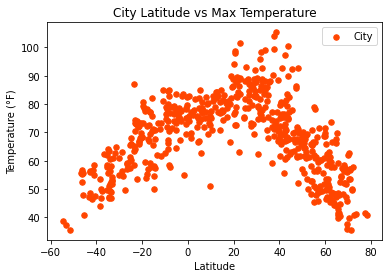

In [13]:
plt.scatter(x = lat, y = max_temp, marker = "o", s = 30, color = "orangered", label = "City" )
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (°F)")
plt.legend(loc = "best")
plt.savefig("Citylatitudevsmaxtemperature.png")
plt.show()

## Latitude vs. Humidity Plot

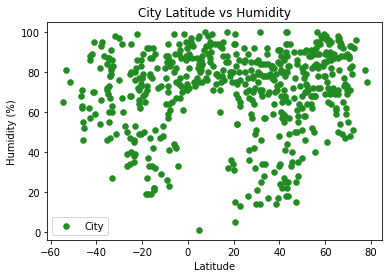

In [14]:
plt.scatter(x = lat, y = humidity, marker = "o", s = 30, color = "forestgreen", label = "City" )
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend(loc = "best")
plt.savefig("Citylatitudevshumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

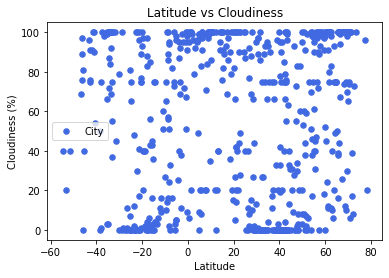

In [15]:
plt.scatter(x = lat, y = cloud, marker = "o", s = 30, color = "royalblue", label = "City" )
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend(loc = "best")
plt.savefig("Citylatitudevscloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

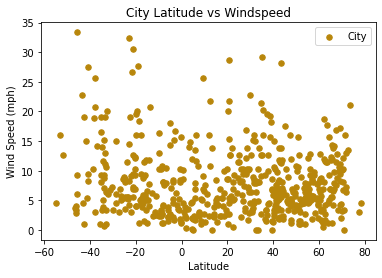

In [16]:
plt.scatter(x = lat, y = wind_speed, marker = "o", s = 30, color = "darkgoldenrod", label = "City" )
plt.title("City Latitude vs Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend(loc = "best")
plt.savefig("Citylatitudevswindspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [17]:
northern_lat = [i for i in lat if (i > 0)]

northern_max_temp = weather_data_df.loc[weather_data_df["Lat"] > 0]["Humidity"].tolist()


In [18]:
numpy_northern_lat = np.array(northern_lat) 
numpy_northern_max_temp = np.array(northern_max_temp)
x_values = numpy_northern_lat
y_values = numpy_northern_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

correlation = st.pearsonr(numpy_northern_lat,northern_max_temp)
print(f'The r value is: {correlation[0]} ')

The r value is: -0.0061362943506716484 


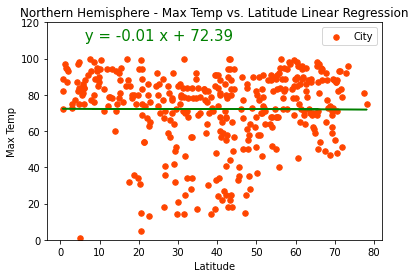

In [19]:
plt.scatter(x = numpy_northern_lat, y = numpy_northern_max_temp, marker = "o", s = 30, color = "orangered", label = "City" )
plt.plot(numpy_northern_lat,regress_values,"green")
plt.annotate(line_eq, (5,110), fontsize = 15, color = "green")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.ylim(0,120)
plt.legend(loc = "best")
plt.savefig("NHmaxtempvslatitudelr.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [20]:
southern_lat = [i for i in lat if (i < 0)]
southern_max_temp = weather_data_df.loc[weather_data_df["Lat"] < 0]["Max Temp"].tolist()

In [21]:
numpy_southern_lat = np.array(southern_lat) 
numpy_southern_max_temp = np.array(southern_max_temp)
x_values = numpy_southern_lat
y_values = numpy_southern_max_temp
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

correlation = st.pearsonr(numpy_southern_lat,numpy_southern_max_temp)
print(f'The r value is: {correlation[0]} ')

The r value is: 0.7713375099986897 


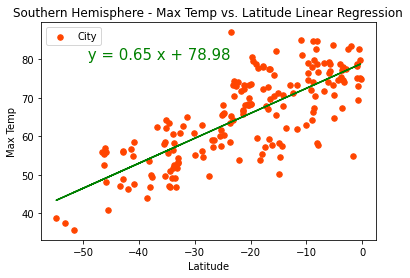

In [22]:
plt.scatter(x = numpy_southern_lat, y = southern_max_temp, marker = "o", s = 30, color = "orangered", label = "City" )
plt.plot(numpy_southern_lat,regress_values,"green")
plt.annotate(line_eq, (-50,80), fontsize = 15, color = "green")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.legend(loc = "best")
plt.savefig("SHmaxtempvslatitudelr.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [23]:
northern_humidity = weather_data_df.loc[weather_data_df["Lat"] > 0]["Humidity"].tolist()


In [24]:
numpy_northern_humidity = np.array(northern_humidity)
x_values = numpy_northern_lat
y_values = numpy_northern_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

correlation = st.pearsonr(numpy_northern_lat,numpy_northern_humidity)
print(f'The r value is: {correlation[0]} ')

The r value is: -0.0061362943506716484 


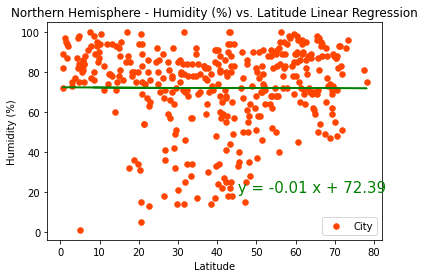

In [25]:
plt.scatter(x = numpy_northern_lat, y = numpy_northern_humidity, marker = "o", s = 30, color = "orangered", label = "City" )
plt.plot(numpy_northern_lat, regress_values,"green")
plt.annotate(line_eq, (44,20), fontsize = 15, color = "green")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend(loc = "best")
plt.savefig("NHhumidityvslatitudelr.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [26]:
southern_humidity = weather_data_df.loc[weather_data_df["Lat"] < 0]["Humidity"].tolist()

In [27]:
numpy_southern_humidity = np.array(southern_humidity)
x_values = numpy_southern_lat
y_values = numpy_southern_humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

correlation = st.pearsonr(numpy_southern_lat,numpy_southern_humidity)
print(f'The r value is: {correlation[0]} ')

The r value is: 0.00996349272038711 


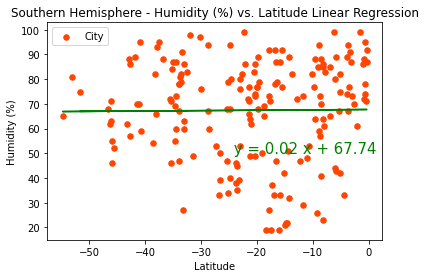

In [28]:
plt.scatter(x = numpy_southern_lat, y = numpy_southern_humidity, marker = "o", s = 30, color = "orangered", label = "City" )
plt.plot(numpy_southern_lat,regress_values,"green")
plt.annotate(line_eq, (-25,50), fontsize = 15, color = "green")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.legend(loc = "best")
plt.savefig("SHhumidityvslatitudelr.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [43]:
northern_cloud = weather_data_df[weather_data_df["Lat"] > 0]["Cloudiness"].tolist()

In [44]:
numpy_northern_cloud = np.array(northern_cloud)
x_values = numpy_northern_lat
y_values = numpy_northern_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

correlation = st.pearsonr(numpy_northern_lat,numpy_northern_cloud)
print(f'The r value is: {correlation[0]} ')

The r value is: -0.002818461018790049 


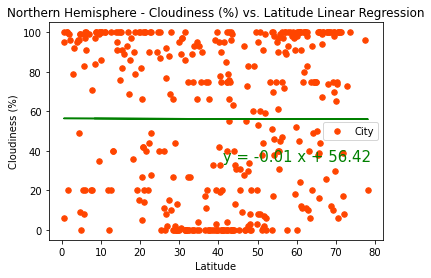

In [45]:
plt.scatter(x = numpy_northern_lat, y = numpy_northern_cloud, marker = "o", s = 30, color = "orangered", label = "City" )
plt.plot(numpy_northern_lat,regress_values,"green")
plt.annotate(line_eq, (40,35), fontsize = 15, color = "green")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend(loc = "best")
plt.savefig("NHcloudinessvslatitudelr.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [46]:
southern_cloud = weather_data_df[weather_data_df["Lat"] < 0]["Cloudiness"].tolist()

In [47]:
numpy_southern_cloud = np.array(southern_cloud)
x_values = numpy_southern_lat
y_values = numpy_southern_cloud
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

correlation = st.pearsonr(numpy_southern_lat,numpy_southern_cloud)
print(f'The r value is: {correlation[0]} ')

The r value is: -0.09599486732333143 


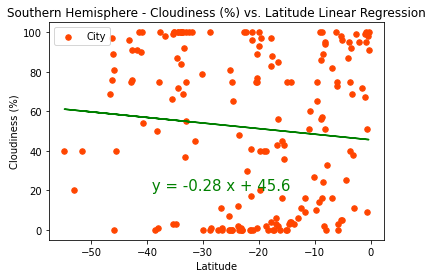

In [48]:
plt.scatter(x = numpy_southern_lat, y = numpy_southern_cloud, marker = "o", s = 30, color = "orangered", label = "City" )
plt.plot(numpy_southern_lat,regress_values,"green")
plt.annotate(line_eq, (-40,20), fontsize = 15, color = "green")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend(loc = "best")
plt.savefig("SHcloudinessvslatitudelr.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [35]:
northern_wind_speed = weather_data_df[weather_data_df["Lat"] > 0]["Wind Speed"].tolist()


In [36]:
numpy_northern_wind_speed = np.array(northern_wind_speed)
x_values = numpy_northern_lat
y_values = numpy_northern_wind_speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

correlation = st.pearsonr(numpy_northern_lat,numpy_northern_wind_speed)
print(f'The r value is: {correlation[0]} ')

The r value is: 0.04851232974882787 


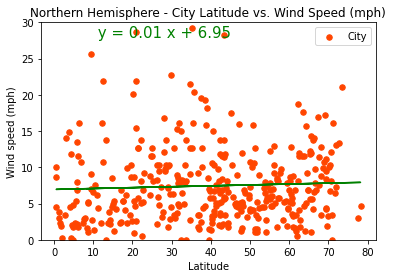

In [37]:
plt.scatter(x = numpy_northern_lat, y = numpy_northern_wind_speed, marker = "o", s = 30, color = "orangered", label = "City" )
plt.plot(numpy_northern_lat,regress_values,"green")
plt.annotate(line_eq, (10,28), fontsize = 15, color = "green")
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (mph)")
plt.ylim(0,30)
plt.legend(loc = "best")
plt.savefig("NHlatitudevswindspeed.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [38]:
southern_wind_speed = weather_data_df[weather_data_df["Lat"] < 0]["Wind Speed"].tolist()


In [39]:
numpy_southern_wind_speed = np.array(southern_wind_speed)
x_values = numpy_southern_lat
y_values = numpy_southern_wind_speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept 
line_eq = f' y = {round(slope,2)} x + {round(intercept,2)}'

correlation = st.pearsonr(numpy_southern_lat,numpy_southern_wind_speed)
print(f'The r value is: {correlation[0]} ')

The r value is: -0.2480252746588421 


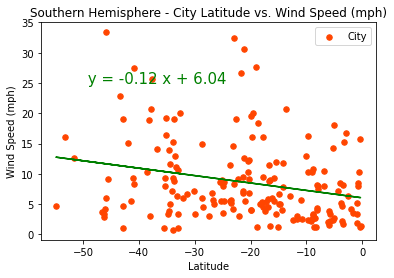

In [40]:
plt.scatter(x = numpy_southern_lat, y = numpy_southern_wind_speed, marker = "o", s = 30, color = "orangered", label = "City" )
plt.plot(numpy_southern_lat,regress_values,"green")
plt.annotate(line_eq, (-50,25), fontsize = 15, color = "green")
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend(loc = "best")
plt.savefig("SHlatitudevswindspeedlr.png")
plt.show()

# Observations:  

It is interesting to see that there seems to be correlation between max temperatures and latitudes in the southern hemisphere but there is very little in the northern hemisphere.  Also, there is very little correlation between windspeed and latitude. Moreover, as we get near the equator, the max temperature increases. 